<a href="https://colab.research.google.com/github/ginttone/multi_deeplearning/blob/master/NLP/Seq2Seq2_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load Datas

In [9]:
import numpy as np

In [14]:
index_inputs = np.load(open('./drive/MyDrive/Multi_test_deeplearning/train_inputs.npy','rb'))
index_outputs = np.load(open('./drive/MyDrive/Multi_test_deeplearning/train_outputs.npy','rb'))
index_targets = np.load(open('./drive/MyDrive/Multi_test_deeplearning/train_targets.npy','rb'))

type(index_inputs),type(index_outputs),type(index_targets)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [15]:
index_inputs[3:5]

array([[ 20,  30, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 93,   7,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [ ]:
!python -m pip install konlpy

preprocess.py 파일 로드

In [20]:
import preprocess as pp

In [21]:
prepro_configs = pp.json.load(open('./drive/MyDrive/Multi_test_deeplearning/data_configs.json','r'))

In [22]:
type(prepro_configs)

dict

In [24]:
prepro_configs.keys()

dict_keys(['char2idx', 'idx2char', 'vocab_size', 'pad_symbol', 'std_symbol', 'end_symbol', 'unk_symbol'])

## seq 2 seq - Model 만들기
```
Encoder -> context -> Decoder
input                 input
Embedding             Embedding
LSTM                  LSTM
```

In [25]:
import tensorflow as tf

### Encode model

In [30]:
vocab_size = prepro_configs['vocab_size']

In [31]:
latent_dim = 60

In [32]:
encode_input = tf.keras.Input(shape = (None,))

In [33]:
encode_hidden = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=latent_dim)(encode_input)

return_state=True 해주면 parameter(자기상태값)가 3개가 날라온다. 


In [34]:
encode_output, state_h, state_c = tf.keras.layers.LSTM(50, return_state=True)(encode_hidden)

In [35]:
encode_states = [state_h , state_c]

### Decode model


In [40]:
decode_input = tf.keras.Input(shape=(None,))

In [41]:
decode_hidden = tf.keras.layers.Embedding(input_dim = vocab_size ,output_dim = latent_dim)(decode_input)

In [42]:
decode_LSTM, _,_ = tf.keras.layers.LSTM(50,return_state = True, return_sequences=True)(decode_hidden,initial_state = encode_states)

입력과 출력이 모두 target vocab size만큼 나옴

In [44]:
decode_output = tf.keras.layers.Dense(vocab_size, activation='softmax')(decode_LSTM)

In [45]:
model = tf.keras.models.Model(inputs=[encode_input,decode_input], outputs = decode_output)

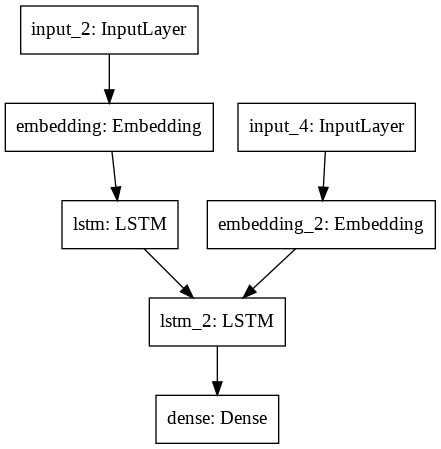

In [46]:
tf.keras.utils.plot_model(model)